In [1]:
#回归python库实践 statsmodels

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [12]:
#==生成自变量样本x==
n = 20
x = np.linspace(0,10,n)#返回0到10之间的20个均匀间隔的数字
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [13]:
#一元线性回归方程 y = β0 + β1x + e (β为参数，e为误差项）

#β0x项 x为固定1，便于公式合并
#构造X项，给上面x数组补一维（补一列）常数项1的
X = sm.add_constant(x)
X


array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [14]:
#==指定参数值β0 β1 ==
#设为固定的2,5，来算一组真实值y，来构造一组原始数据，用于训练回归
beta = np.array([2,5])
beta

array([2, 5])

In [15]:
#==设置误差项==
e = np.random.normal(size = n)
#生成和x样本数相同数量的随机正常(正态)分布数组
e

array([ 1.51815685, -0.72941161,  1.25028375, -0.80184078, -0.62902683,
       -0.83760688, -0.07118702,  1.03692492,  1.48069091, -2.34547212,
       -0.66611284, -0.99179133,  1.2707308 , -1.04547287, -0.08127298,
       -0.4714963 ,  0.50994516, -0.13003042,  1.2804906 ,  1.65289572])

In [17]:
#==求y实例值：把上面各项假定值代入公式==
y = np.dot(X,beta) +e
y

array([ 3.51815685,  3.90216733,  8.51344164,  9.09289606, 11.89728896,
       14.32028786, 17.71828667, 21.45797755, 24.53332249, 23.33873841,
       27.64967664, 29.95557709, 34.84967817, 35.16505345, 38.76083229,
       41.00218791, 44.61520832, 46.60681168, 50.64891165, 53.65289572])

In [24]:
#用上面的真实值y和X值(已知的线性关系，上面线性关系方程算出来的)做数据来训练模型
#==最小二乘法建模sm.OLS回归==
#让真实观测值与预测值之差最小，最好是都在回归线上，回归线上的是预测值。
model = sm.OLS(y,X)#实例化
#开始训练拟和数据
res = model.fit()
#打印回归系数β0 β1
print("参数，回关系数β0 β1:",res.params)
#打印估计值（预测值）
y_ = res.fittedvalues
print("y估计值预测值：",y_)

参数，回关系数β0 β1: [1.84405796 5.04318238]
y估计值预测值： [ 1.84405796  4.49836447  7.15267099  9.8069775  12.46128401 15.11559053
 17.76989704 20.42420355 23.07851007 25.73281658 28.38712309 31.04142961
 33.69573612 36.35004263 39.00434915 41.65865566 44.31296217 46.96726869
 49.6215752  52.27588171]


In [20]:
#查看全部信息用summary()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3587.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           3.59e-22
Time:                        19:47:23   Log-Likelihood:                -29.996
No. Observations:                  20   AIC:                             63.99
Df Residuals:                      18   BIC:                             65.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8441      0.493      3.744      0.001       0.809       2.879
x1             5.0432      0.084     59.890      0.000       4.866       5.220
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.545
Skew:                          -0.079   Prob(JB):                        0.761
Kurtosis:                       2.207   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

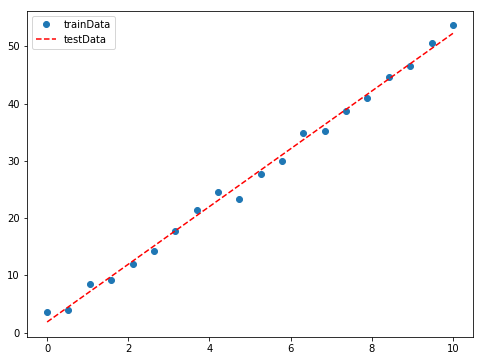

In [27]:
#==画图比较预测值与真实值拟合情况==
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='trainData')#原始数据
ax.plot(x,y_,'r--',label='testData')#拟合（预测）数据
ax.legend(loc='best')
plt.show()

#结果显示这组x与y线性关系拟合显著